# Exploration and classification of dynamical regimes

wrt. weights of ecosystem and trade income

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

/tmp/ipykernel_11385/3404506841.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. ensemble aggregates

In [3]:
data = pd.read_pickle('/p/tmp/fritzku/MayaSim/output/x11_dynamical_regimes/results/ensemble_means.pkl')

data = data.droplevel('test')

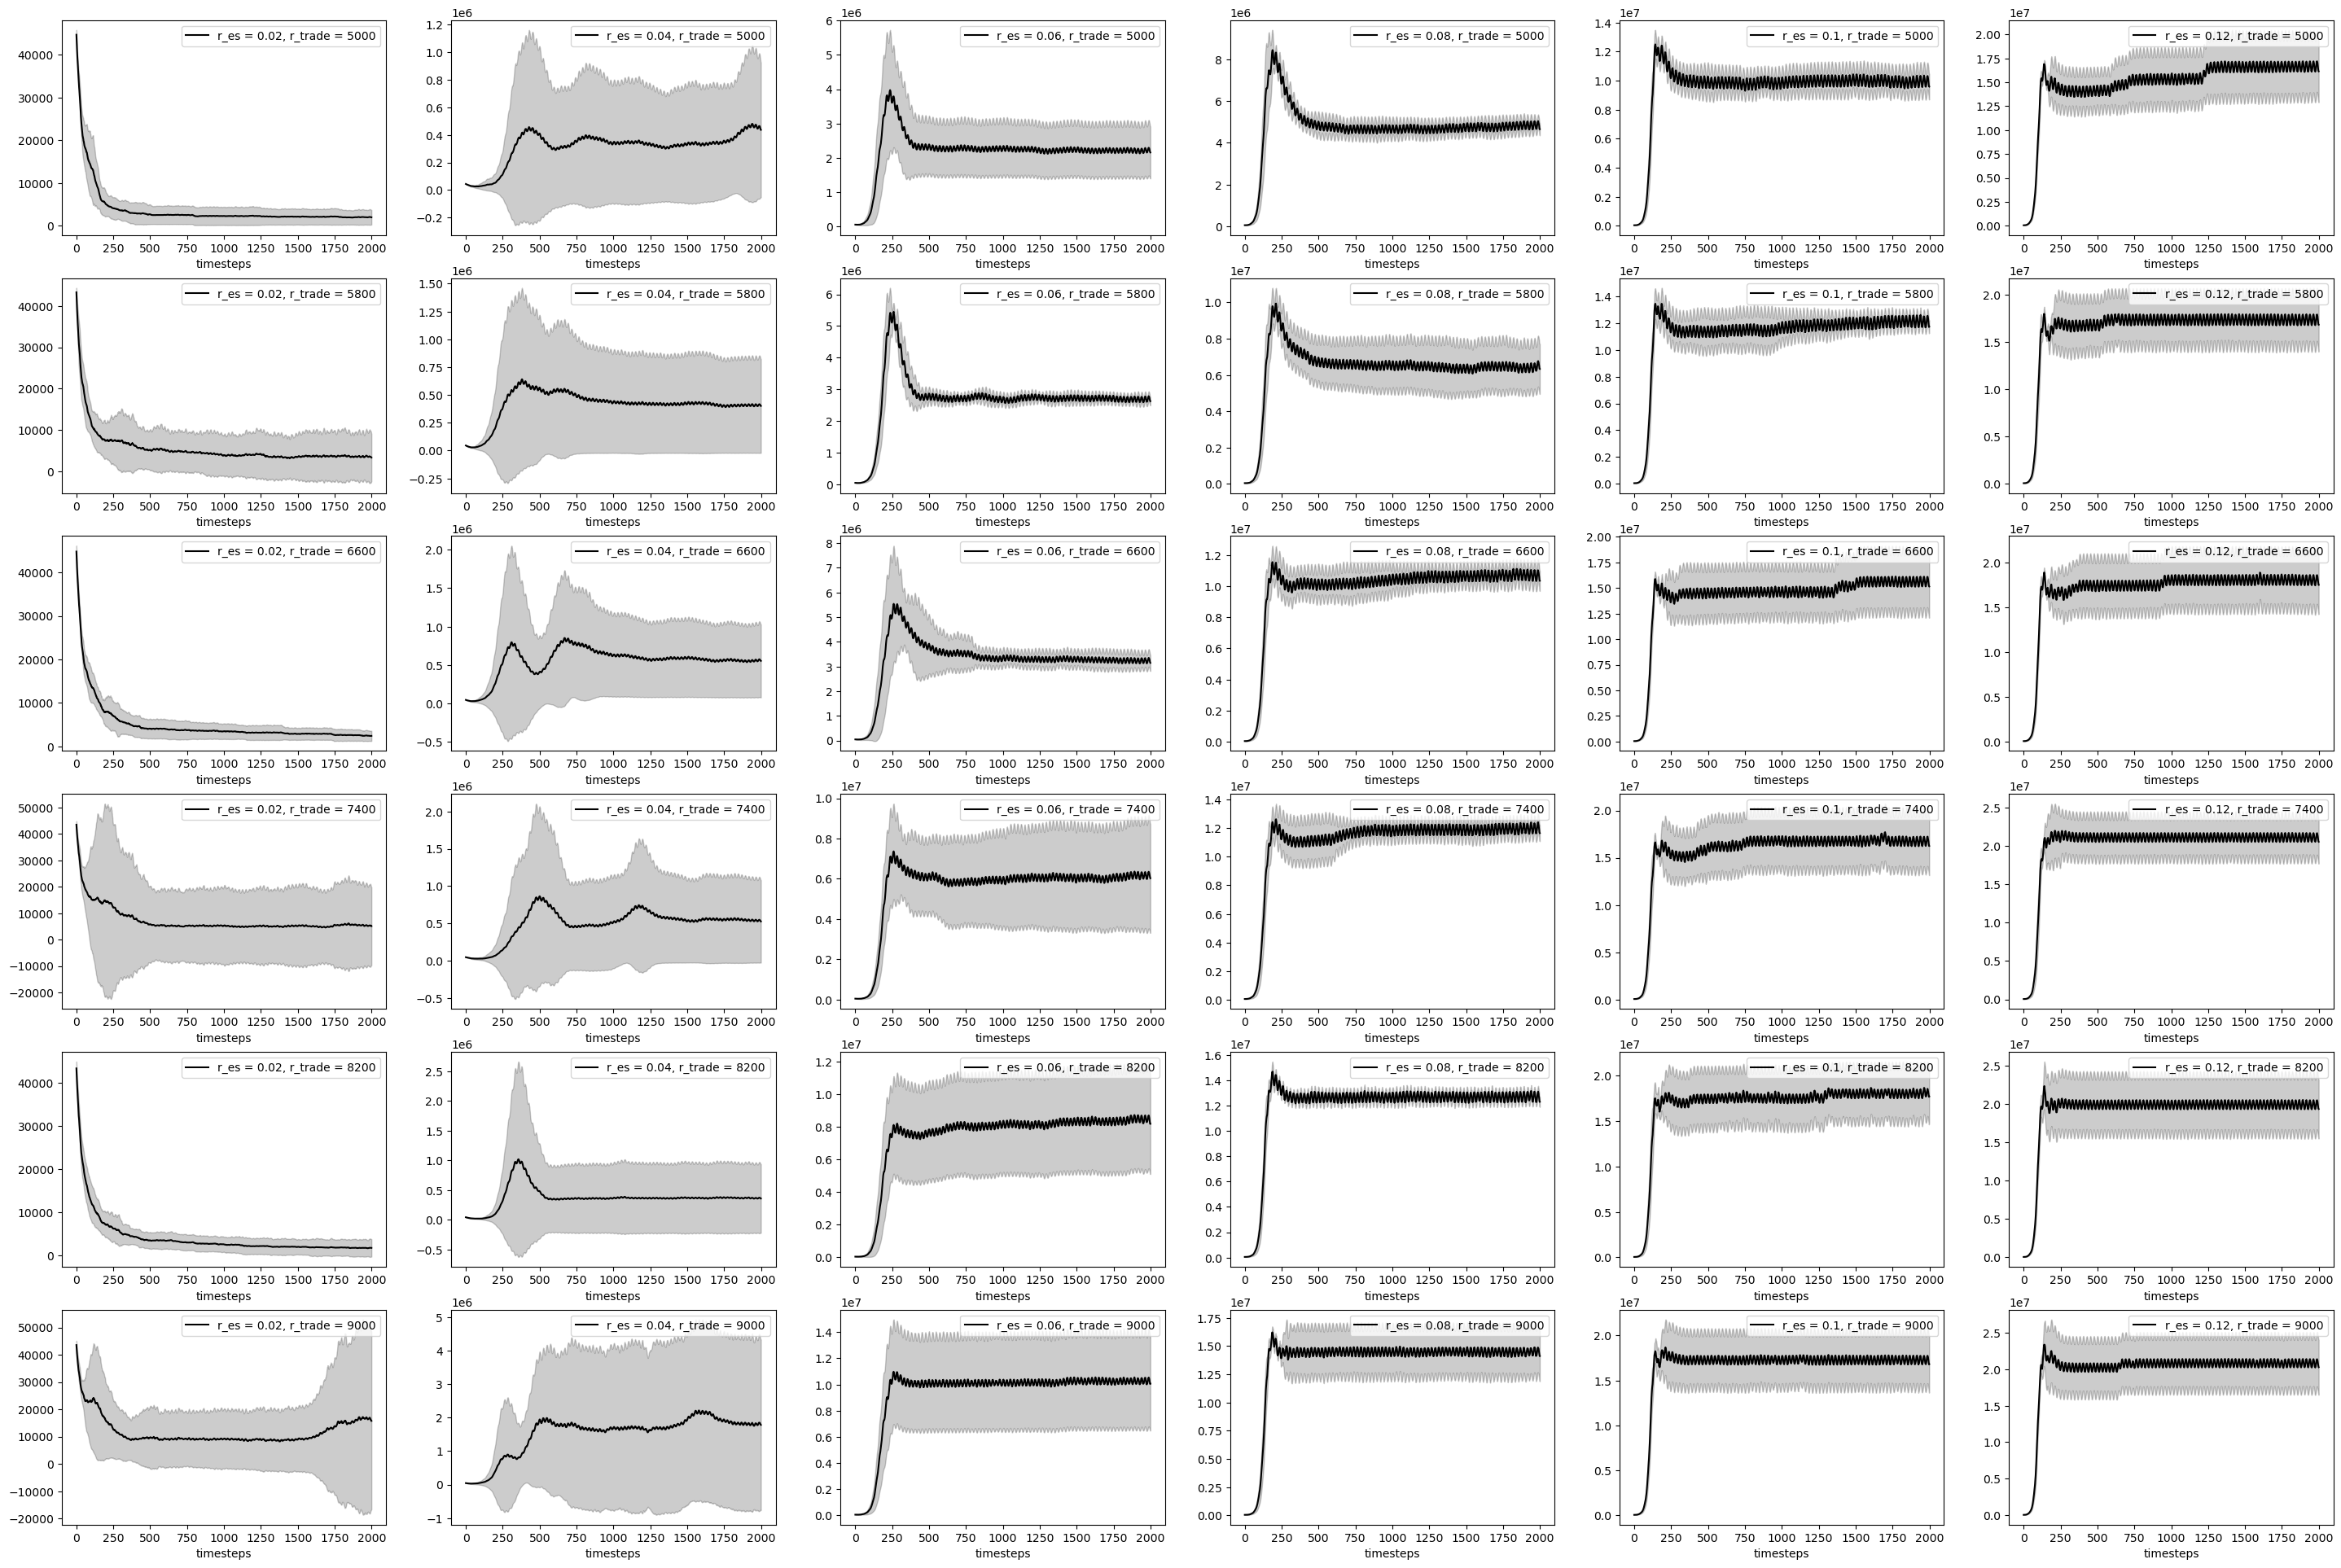

In [7]:
r_trades = [round(x, 5) for x in np.arange(5000, 9400, 800)]
r_ess = [round(x, 4) for x in np.arange(0.02, 0.13, 0.02)]

fig, ax = plt.subplots(nrows=len(r_trades), ncols=len(r_ess))
fig.set_figwidth(6*len(r_ess))
fig.set_figheight(4*len(r_trades))

for ((i, r_es), (j, r_trade)) in it.product(enumerate(r_ess), enumerate(r_trades)):
    # plot mean
    pop_mean = data.loc[(r_trade, r_es)].xs('total_population', level=1)['<ensemble_mean>']
    pop_mean.plot(ax=ax[j,i], legend=False, color='black', label=f'r_es = {r_es}, r_trade = {r_trade}')

    # plot sigma
    pop_sigma = data.loc[(r_trade, r_es)].xs('total_population', level=1)['<ensemble_sigma>']
    ax[j,i].fill_between(pop_mean.index, pop_mean + pop_sigma, pop_mean - pop_sigma, color='black', alpha=.2)

    ax[j,i].legend()

## 2. all aggregate trajectories

In [15]:
r_trades = [round(x, 5) for x in np.arange(5000, 9400, 800)]
r_ess = [round(x, 4) for x in np.arange(0.02, 0.13, 0.02)]

# load data
path = '/p/tmp/fritzku/MayaSim/output/x11_dynamical_regimes/results/all_trjs_f.hd5'
with pd.HDFStore(path) as store:
    df = store.select('d1', where=f'r_trade = {r_trades} & r_es = {r_ess}', columns=['total_population'])
    df = df.droplevel('test')

In [ ]:
df.index

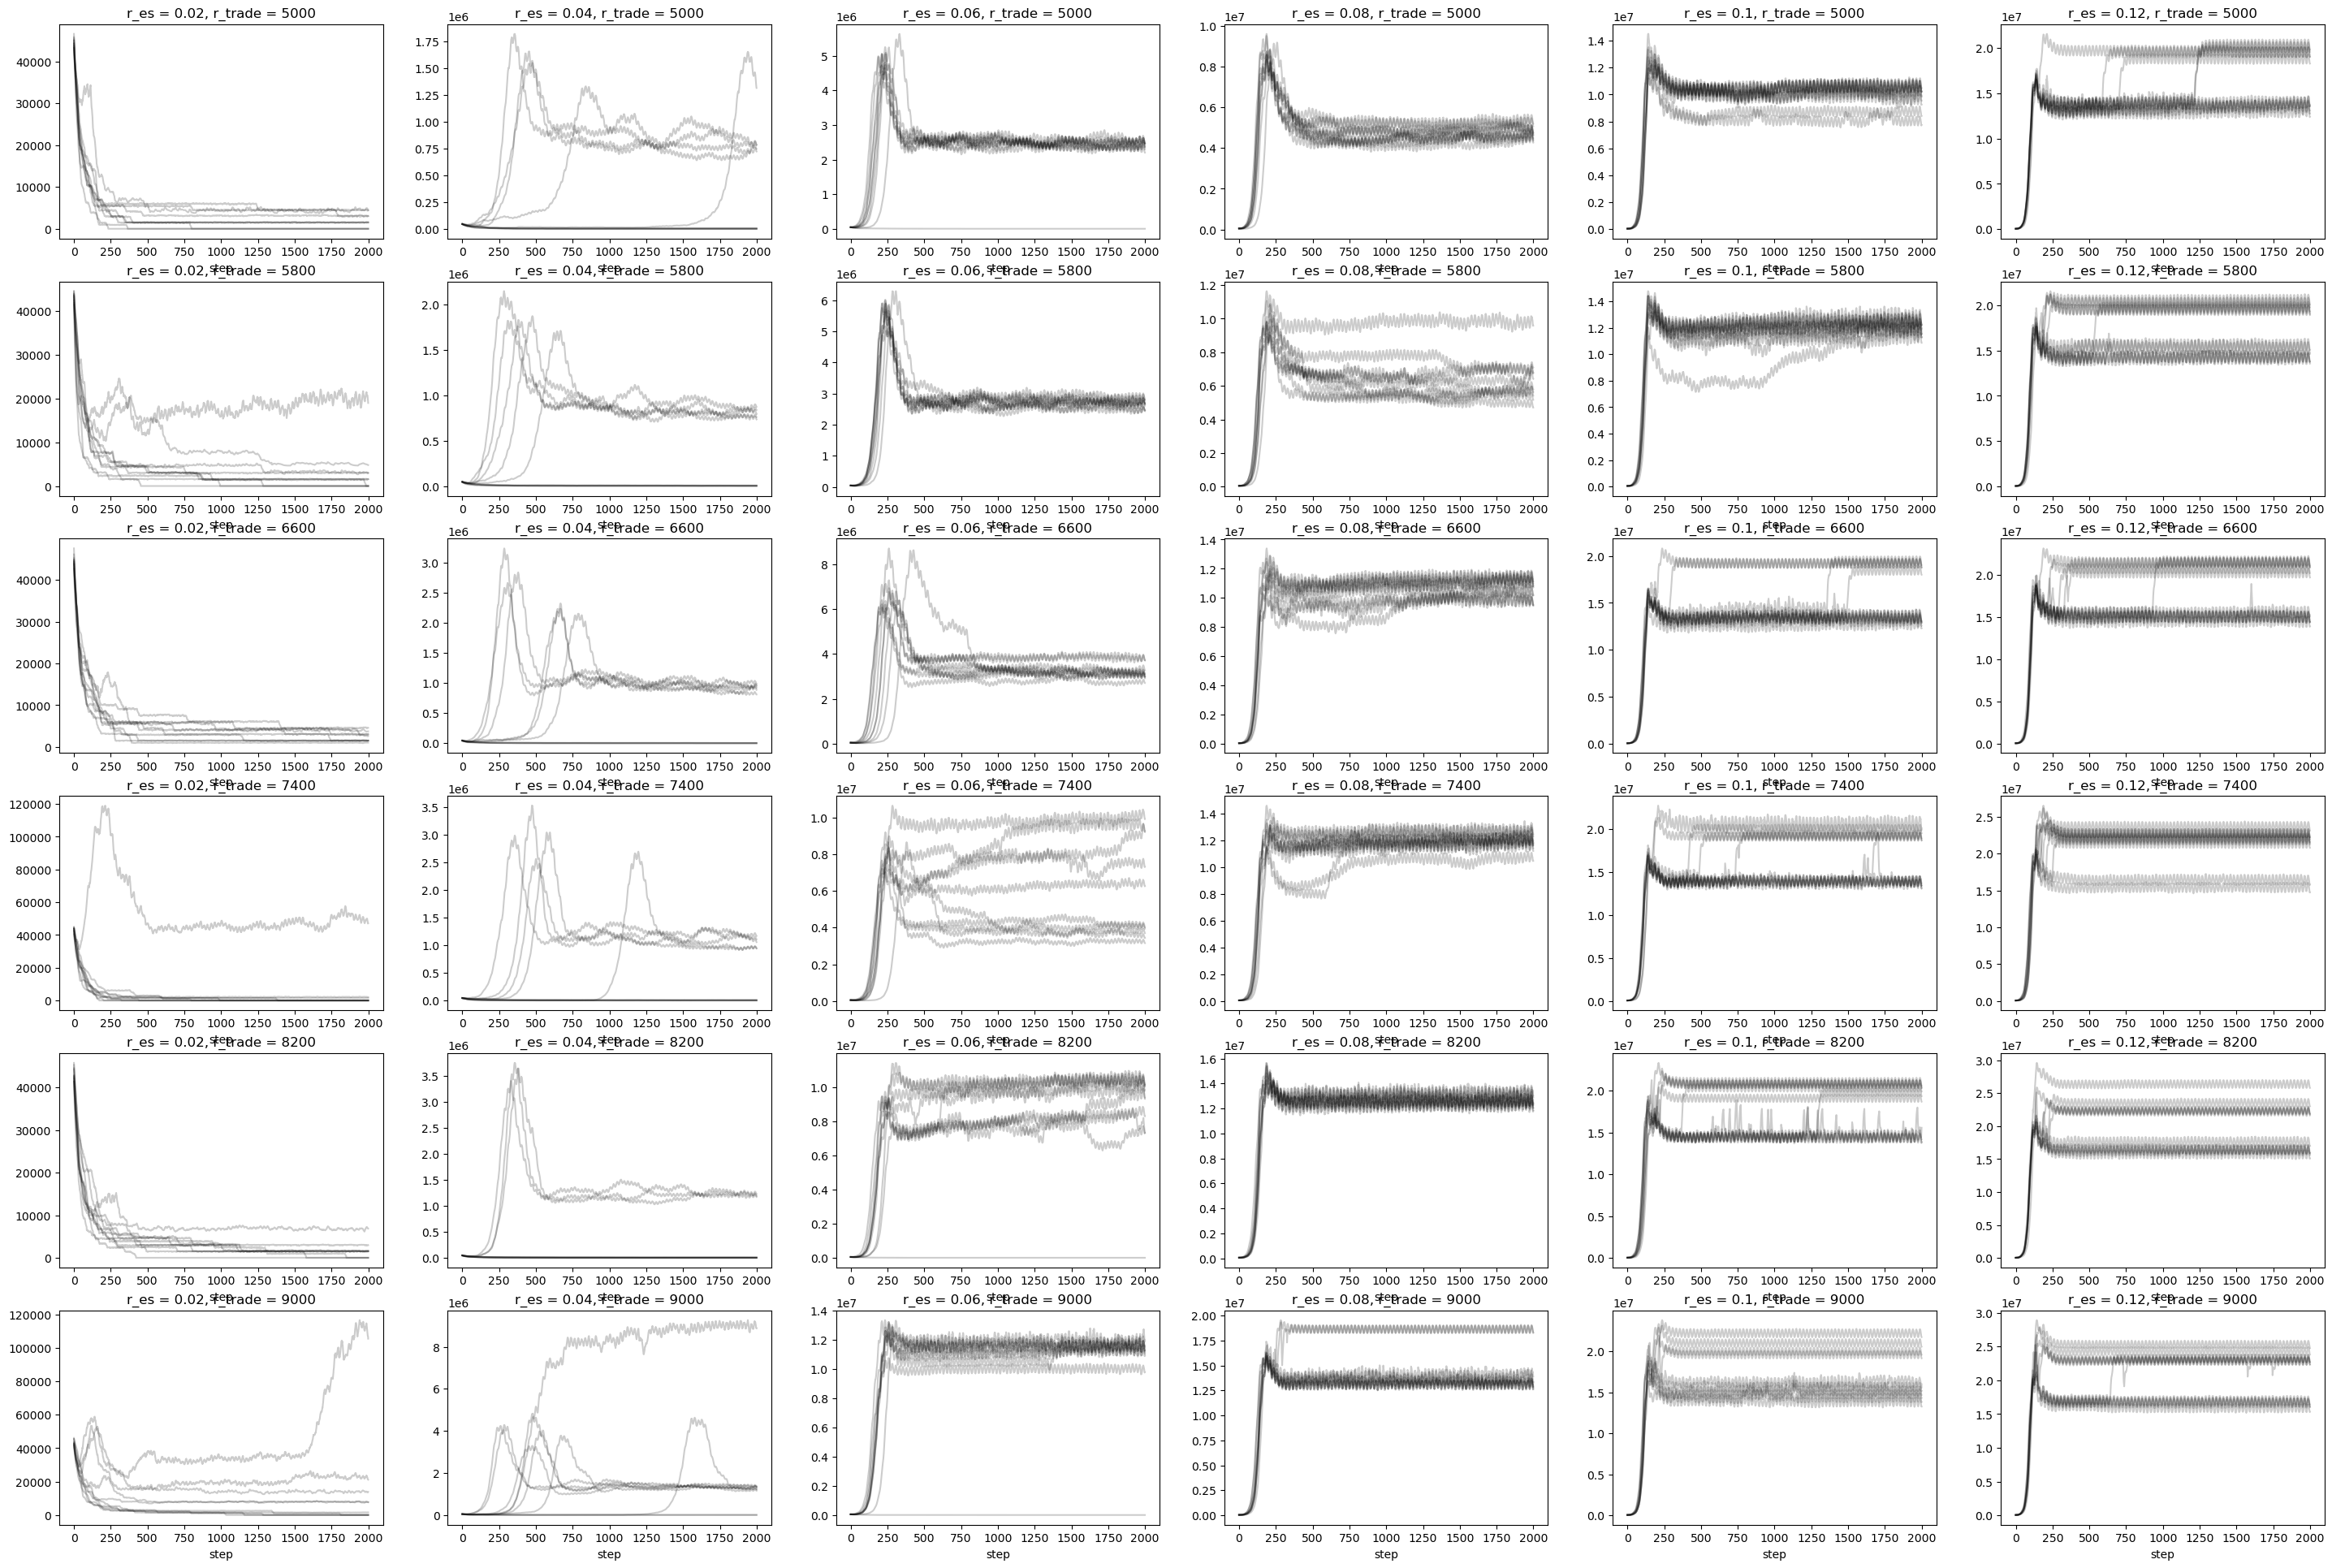

In [16]:
fig, ax = plt.subplots(nrows=len(r_trades), ncols=len(r_ess))
fig.set_figwidth(6*len(r_ess))
fig.set_figheight(4*len(r_trades))

for ((i, r_es), (j, r_trade)) in it.product(enumerate(r_ess), enumerate(r_trades)):
    runs = df.loc[(r_trade, r_es)].unstack('run_id').plot(ax=ax[j,i], legend=False, color='black', alpha=.2)
    ax[j,i].set_title(f'r_es = {r_es}, r_trade = {r_trade}')

computation time 28834487: 06:42:53

- turn off climate variability and compare
- reintroduce array jobs to hopefully compute faster -> get more samples and higher parameter resolution 